# Demo

Do imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ae483tools import *

Load data from a flight in which the drone took off, moved in a square, and landed.

In [2]:
raw_data_drone, raw_data_mocap = load_hardware_data('square.json')

Resample drone data.

In [3]:
data_drone = resample_data_drone(raw_data_drone, t_min_offset=0.019, t_max_offset=0.)

t = data_drone['time']
x_drone = data_drone['stateEstimate.x']
y_drone = data_drone['stateEstimate.y']
z_drone = data_drone['stateEstimate.z']
psi_drone = np.deg2rad(data_drone['stateEstimate.yaw'])
theta_drone = - np.deg2rad(data_drone['stateEstimate.pitch'])
phi_drone = np.deg2rad(data_drone['stateEstimate.roll'])

Resample mocap data (with an optimal time shift and with coordinate transformation).

In [4]:
data_mocap = sync_data_mocap(raw_data_mocap, t, z_drone)

# # Resample mocap data with the time shift that minimizes RMSE
# resampled_data_mocap = resample_data_mocap(raw_data_mocap, t, t_shift=-2.1)

# # Transform mocap data
# data_mocap = transform_data_mocap(resampled_data_mocap)

x_mocap = data_mocap['x']
y_mocap = data_mocap['y']
z_mocap = data_mocap['z']
psi_mocap = data_mocap['yaw']
theta_mocap = data_mocap['pitch']
phi_mocap = data_mocap['roll']

Shifting data by 0.12999999999999998 seconds


Plot $x, y$ data.

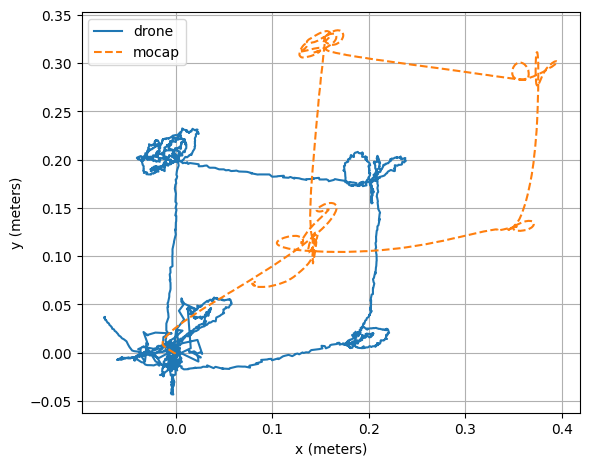

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
ax.plot(x_drone, y_drone, label='drone')
ax.plot(x_mocap, y_mocap, '--', label='mocap')
ax.legend()
ax.grid()
ax.set_aspect('equal')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
plt.show()

Plot all data.

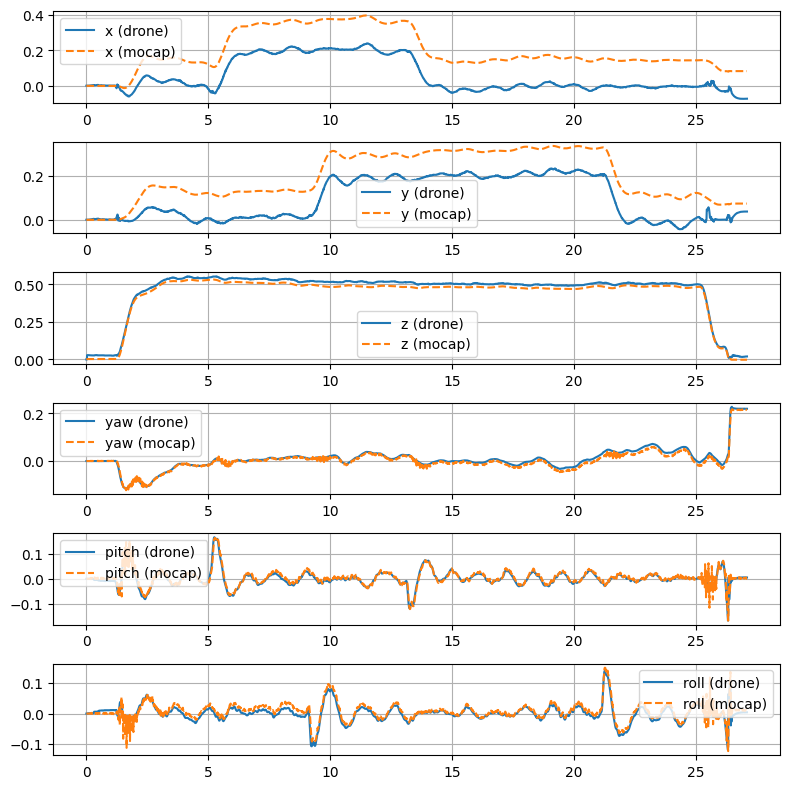

In [6]:
fig, (ax_x, ax_y, ax_z, ax_psi, ax_theta, ax_phi) = plt.subplots(6, 1, figsize=(8, 8), tight_layout=True)

ax_x.plot(t, x_drone, label='x (drone)')
ax_x.plot(t, x_mocap, '--', label='x (mocap)')
ax_x.legend()
ax_x.grid()

ax_y.plot(t, y_drone, label='y (drone)')
ax_y.plot(t, y_mocap, '--', label='y (mocap)')
ax_y.legend()
ax_y.grid()

ax_z.plot(t, z_drone, label='z (drone)')
ax_z.plot(t, z_mocap, '--', label='z (mocap)')
ax_z.legend()
ax_z.grid()

ax_psi.plot(t, psi_drone, label='yaw (drone)')
ax_psi.plot(t, psi_mocap, '--', label='yaw (mocap)')
ax_psi.legend()
ax_psi.grid()

ax_theta.plot(t, theta_drone, label='pitch (drone)')
ax_theta.plot(t, theta_mocap, '--', label='pitch (mocap)')
ax_theta.legend()
ax_theta.grid()

ax_phi.plot(t, phi_drone, label='roll (drone)')
ax_phi.plot(t, phi_mocap, '--', label='roll (mocap)')
ax_phi.legend()
ax_phi.grid()

plt.show()